# Coronavirus trends

## Preprocessing

In [1]:
import os 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline    

## Functions

In [2]:
def dating_machine(df):
    "Takes a boring old DataFrame and returns the sexiest dates formatted in the coolest ways"
    df['month'] = pd.to_datetime(arg=df.loc[:, 'date']).dt.month_name()
    df['month_n'] = pd.to_datetime(arg=df.loc[:, 'date']).dt.month
    df['day'] = pd.to_datetime(arg=df.loc[:, 'date']).dt.day_name()
    df['day_y'] = pd.to_datetime(arg=df.loc[:, 'date']).dt.dayofyear
    df['day_w'] = pd.to_datetime(arg=df.loc[:, 'date']).dt.dayofweek
    df['week_y'] = pd.to_datetime(arg=df.loc[:, 'date']).dt.weekofyear
    
    return df

The `coronavirustrends` folder contains 19 files for each of the subreddits in our shortlist. The subreddits are named by number so they can easily be looped over. 

In [298]:
# Point to directory containing data
DATA_DIR = 'C:\\Users\\delah\\Documents\\Programming\\workspace\\AAForB_Assignment4\\data'
ANALYSIS_DIR = '\\coronavirustrends'
INPUT_DIR = '\\input'
OUTPUT_DIR = '\\output'
VIS_DIR = 'C:\\Users\\delah\\Documents\\Programming\\workspace\\AAForB_Assignment4\\outputs\\exploratory_analysis\\coronatrends\\'


os.chdir(DATA_DIR + ANALYSIS_DIR + INPUT_DIR)

# Importing data and renaming columns
df = pd.DataFrame()
for i in range(1,20):
    temp = pd.read_csv(str(i))
    df = df.append(temp)
    
df = df.rename(columns={'p.title':'title','s.display_name':'subreddit','p.created_utc_str':'date','p.score':'score'})

# Extract subreddits
subreddits = list(set(df.loc[:,['subreddit']].values.flatten()))
print("Number of subreddits extracted:", len(list(subreddits)))
print(subreddits)

# Get months, weeks and days
df = dating_machine(df)

df.head()
                 

Number of subreddits extracted: 19
['coronavirus', 'lifeprotips', 'technology', 'iama', 'china_flu', 'dataisbeautiful', 'nottheonion', 'worldnews', 'europe', 'todayilearned', 'politics', 'upliftingnews', 'videos', 'explainlikeimfive', 'news', 'science', 'askscience', 'askreddit', 'covid19']


,title,subreddit,date,score,month,month_n,day,day_y,day_w,week_y
0,Redditors bored because coronavirus cancelled ...,askreddit,2020-03-13 15:17:31,3,March,3,Friday,73,4,11
1,Why would a second coronavirus wave breakout i...,askreddit,2020-04-13 05:58:50,1,April,4,Monday,104,0,16
2,What good things are happening right now but i...,askreddit,2020-04-15 00:10:04,1,April,4,Wednesday,106,2,16
3,"So now, what is the most memorable fake news y...",askreddit,2020-03-28 21:16:05,1,March,3,Saturday,88,5,13
4,people who had to use the health system during...,askreddit,2020-03-23 23:45:51,1,March,3,Monday,83,0,13


In [303]:
set(df.sort_values(by='subreddit').subreddit.values)

{'askreddit',
 'askscience',
 'china_flu',
 'coronavirus',
 'covid19',
 'dataisbeautiful',
 'europe',
 'explainlikeimfive',
 'iama',
 'lifeprotips',
 'news',
 'nottheonion',
 'politics',
 'science',
 'technology',
 'todayilearned',
 'upliftingnews',
 'videos',
 'worldnews'}

**Saving Data**

In [11]:
os.chdir(DATA_DIR + ANALYSIS_DIR + OUTPUT_DIR)
df.to_csv('coronavirus_trends.csv')

## Exploration

summary statistics

In [12]:
print(df.describe())
print()
print(df.info())

               score       month_n         day_y         day_w        week_y
count   86008.000000  86008.000000  86008.000000  86008.000000  86008.000000
mean      394.024812      2.987222     75.615908      2.904869     11.530148
std      3311.232684      0.720782     19.629315      1.943131      2.818387
min         0.000000      1.000000      9.000000      0.000000      2.000000
25%         1.000000      3.000000     65.000000      1.000000     10.000000
50%        10.000000      3.000000     77.000000      3.000000     12.000000
75%        45.000000      3.000000     89.000000      4.000000     13.000000
max    153622.000000      4.000000    114.000000      6.000000     17.000000

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86008 entries, 0 to 76
Data columns (total 10 columns):
title        86008 non-null object
subreddit    86008 non-null object
date         86008 non-null object
score        86008 non-null int64
month        86008 non-null object
month_n      86008 non-nul

## Univariate Exploration

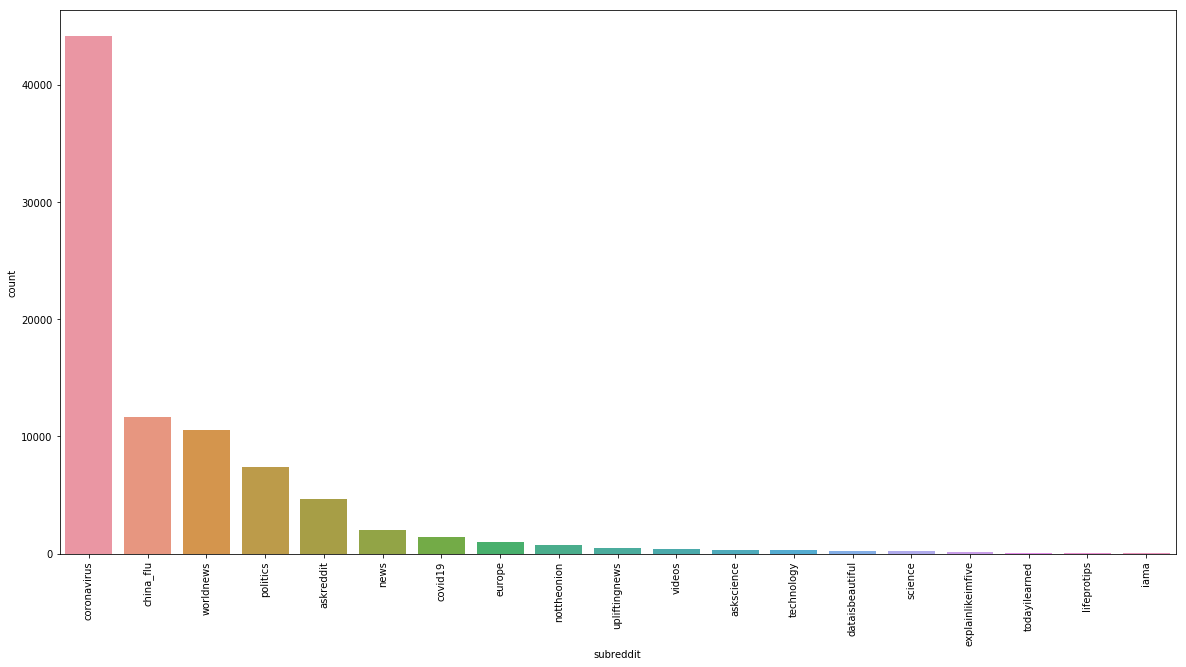

In [22]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
chart = sns.countplot(data=df,x='subreddit',ax=ax, order=df['subreddit'].value_counts().index)
ax.set_xticklabels(rotation=90,labels=ax.get_xticklabels())

plot_name = 'count_of_posts_per_subreddit'
plt.savefig(fname=VIS_DIR + plot_name)

```
MATCH (p:Post)-[e1]-(s:Subreddit{display_name:’askreddit’})WHERE p.title contains ’worldnews’ OR p.title contains ’covid’OR p.title contains ’corona virus’RETURN p.title, s.display_name, p.created_utc_str, p.scoreLIMIT 5000science
```
```
MATCH (p:Post)-[e1]-(s:Subreddit{display_name:’askreddit’})WHERE p.title contains ’china_flu’ OR p.title contains ’covid’OR p.title contains ’corona virus’RETURN p.title, s.display_name, p.created_utc_str, p.scoreLIMIT 5000science
```
```
MATCH (p:Post)-[e1]-(s:Subreddit{display_name:’askreddit’})WHERE p.title contains ’politics’ OR p.title contains ’covid’OR p.title contains ’corona virus’RETURN p.title, s.display_name, p.created_utc_str, p.scoreLIMIT 5000science
```
```
MATCH (p:Post)-[e1]-(s:Subreddit{display_name:’askreddit’})WHERE p.title contains ’coronavirus’ OR p.title contains ’covid’OR p.title contains ’corona virus’RETURN p.title, s.display_name, p.created_utc_str, p.scoreLIMIT 5000science
```




Most subreddits have less than 1000 posts made over the four month period containing terms about the coronavirus. 
We also notice that the first four subreddits peak at 5000. The query on cypher was limited at 5000 for computational efficiency. It is likely that more posts had been made during that time.
Since there is such a discrepancy in volume of these subreddits we decide to continue the analysis with the 9 most popular subreddits. We decided to include a few non popular subreddits to monitor their behavior for further queries.


**IT FOLLOWS EXPONENTIAL DECAY. VICTORIZE THIS TEXT**

C:\Users\delah\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\delah\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\delah\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\delah\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


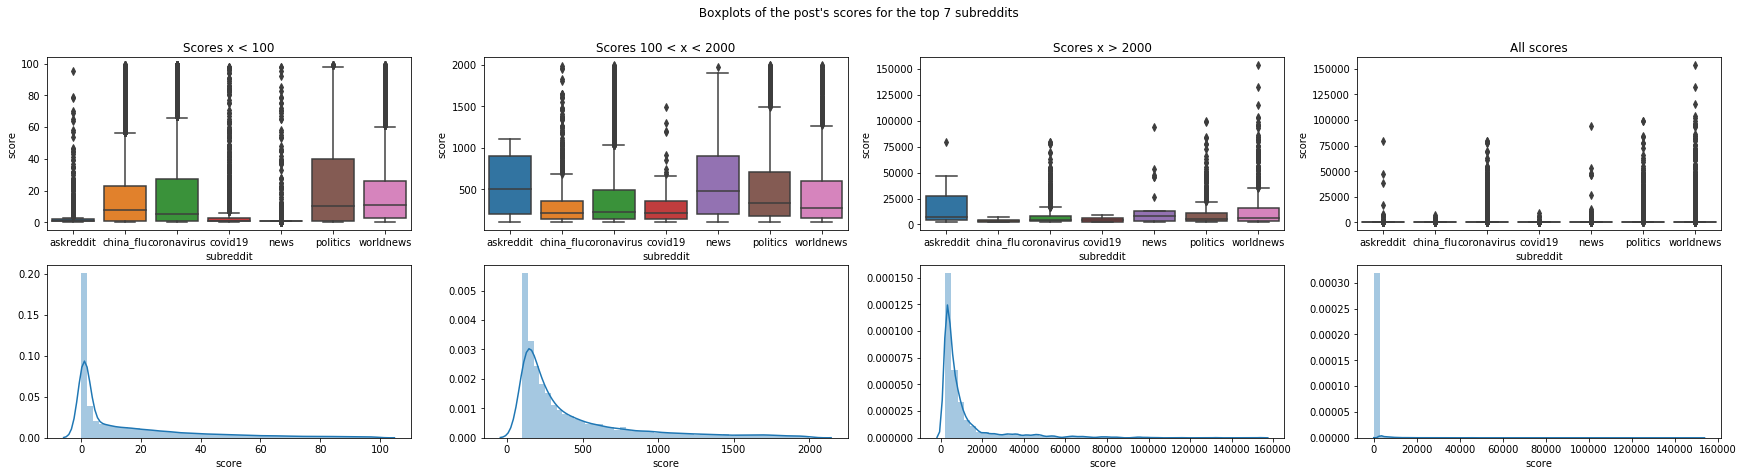

In [23]:
# Filter out the original dataframe to only contain the 7 most popular subreddits
top_7_subreddits = list(df['subreddit'].value_counts().index[0:7])
sub = df.loc[:,'subreddit']
df7 = df.loc[sub.isin(top_7_subreddits)]
df7_very_low_scores = df7.loc[(df7.loc[:,'score'] < 100)]
df7_low_scores = df7.loc[(df7.loc[:,'score'] < 2000) & (df7.loc[:,'score'] > 100)]
df7_high_scores = df7.loc[df7.loc[:,'score'] > 2000]

# Creating figures and axes
fig = plt.figure(figsize=(30,7))
ax1 = fig.add_subplot(2,4,1)
ax2 = fig.add_subplot(2,4,2)
ax3 = fig.add_subplot(2,4,3)
ax4 = fig.add_subplot(2,4,4)
ax5 = fig.add_subplot(2,4,5)
ax6 = fig.add_subplot(2,4,6)
ax7 = fig.add_subplot(2,4,7)
ax8 = fig.add_subplot(2,4,8)


# Titles
fig.suptitle(" Boxplots of the post's scores for the top 7 subreddits")
ax1.set_title('Scores x < 100')
ax2.set_title('Scores 100 < x < 2000')
ax3.set_title('Scores x > 2000')
ax4.set_title('All scores')


# Boxplots
sns.boxplot(data=df7_very_low_scores,x='subreddit',y='score',ax=ax1)
sns.boxplot(data=df7_low_scores,x='subreddit',y='score',ax=ax2)
sns.boxplot(data=df7_high_scores,x='subreddit',y='score',ax=ax3)
sns.boxplot(data=df7,x='subreddit',y='score',ax=ax4)


# Countplots
sns.distplot(a=df7_very_low_scores.score, ax=ax5)
sns.distplot(a=df7_low_scores.score, ax=ax6)
sns.distplot(a=df7_high_scores.score, ax=ax7)
sns.distplot(a=df7.score, ax=ax8)

plot_name = 'boxplots_of_post_scores'
plt.savefig(fname=VIS_DIR + plot_name)

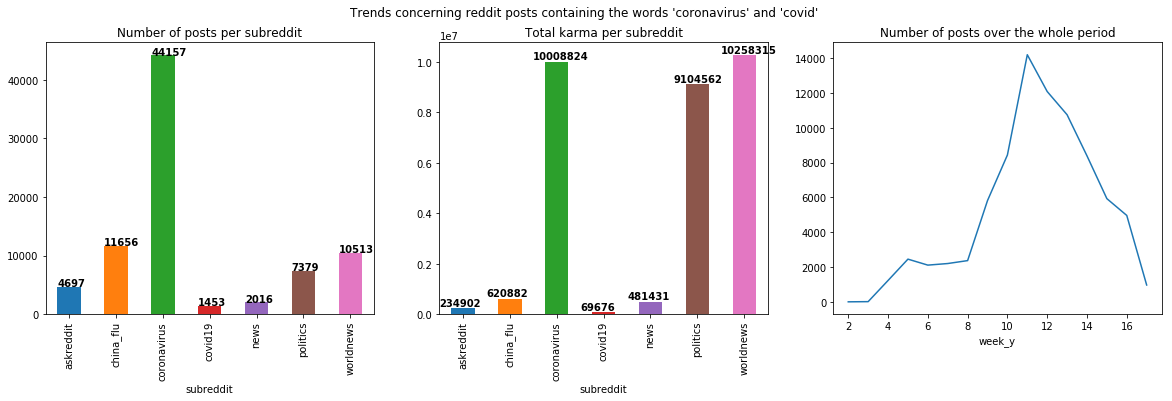

In [24]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1,3,1)
ax2= fig.add_subplot(1,3,2)
ax3= fig.add_subplot(1,3,3)


fig.suptitle("Trends concerning reddit posts containing the words 'coronavirus' and 'covid' " )
ax1.set_title('Number of posts per subreddit')
ax2.set_title('Total karma per subreddit')
ax3.set_title('Number of posts over the whole period')


df7.groupby(by='subreddit').count().score.plot(kind='bar',ax=ax1)
df7.groupby(by='subreddit').sum().score.plot(kind='bar',ax=ax2)
df7.groupby(by='week_y').count().score.plot(ax=ax3)


y1 = df7.groupby(by='subreddit').count().score.values
for i, v in enumerate(y1):
    ax1.text(x=i -0.25 ,y= v + 50 , s=str(v), color='black', fontweight='bold')
    
y2 = df7.groupby(by='subreddit').sum().score.values
for i, v in enumerate(y2):
    ax2.text(x=i -0.5 ,y= v + 100000 , s=str(v), color='black', fontweight='bold')
    
    
plot_name = 'trends_posts_containing_coronavirus_and_covid'
plt.savefig(fname=VIS_DIR + plot_name)

**Remark**

The plot below shows that we have data over the entire period. However the majority of the data comes from the latest months. we need more data

In [25]:
min(df.date.values)

'2020-01-09 03:59:17'

# User analysis

In [36]:
# Setting the directories
DATA_DIR = 'C:\\Users\\delah\\Documents\\Programming\\workspace\\AAForB_Assignment4\\data'
ANALYSIS_DIR = '\\posts'
INPUT_DIR = '\\input\\'
OUTPUT_DIR = '\\output'
os.chdir(DATA_DIR + ANALYSIS_DIR + INPUT_DIR)
df = pd.read_csv('reddit_posts_with_topic_and_sentiment_4.csv',encoding='iso-8859-1')
df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
df.head()

,u.id,username,link_karma,comment_karma,s.id,subreddit,p.id,date,score,upvote_ratio,...,day_w,week_y,total_posts_per_user,total_score_per_user,total_posts_per_subreddit,total_scores_per_subreddit,average_karma_per_post,avg_sentiment,topic,topic_score
0,2o0ngbg8,goddessofthebitches,8376,1346,2dar36,china_flu,fhxap2,2020-03-13T10:05:33Z,16818,0.85,...,4,11,1,16818,9515,804324,16818.000000,0.000000,American Politics and News,57.0
1,tblkklw,DeWallenVanWimKok,21356,6296,2dar36,china_flu,f0p5nc,2020-02-08T08:59:21Z,11927,0.95,...,5,6,157,27710,9515,804324,176.496815,0.150000,Medical Research and Vaccine,47.0
2,14mosq,staplehill,21357,42254,2dar36,china_flu,fbt49e,2020-03-01T12:01:27Z,8922,0.98,...,6,9,14,12187,9515,804324,870.500000,0.103280,Medical Research and Vaccine,33.0
3,14bafgnj,IcyPresence96,4160,535,2dar36,china_flu,feupgd,2020-03-07T12:49:04Z,7043,0.91,...,5,10,4,7074,9515,804324,1768.500000,0.232119,American Politics and News,64.0
4,wo4fw,madman320,48415,22054,2dar36,china_flu,f30lyn,2020-02-12T23:49:03Z,6811,0.96,...,2,7,168,33525,9515,804324,199.553571,0.374166,Statistics Reporting,73.0


In [142]:
grp.head()

,username,link_karma,comment_karma,total_posts_per_user,total_score_per_user
11568,hildebrand_rarity,432917,157806,342,891607
16435,Frocharocha,8837272,278659,643,848221
24030,hash0t0,365905,12663,911,641230
6357,SeventhConstellation,418102,2890,4628,624213
11724,mythrowawaybabies,351904,34443,745,550737


C:\Users\delah\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\delah\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


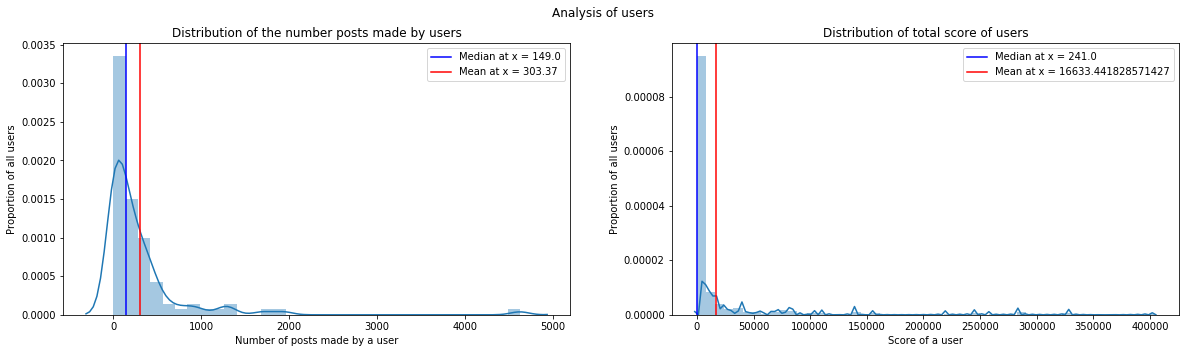

In [297]:
grp = df.groupby(by='username').count().link_karma.sort_values(ascending=False)

fig = plt.figure(figsize=(20,5))
plot_name = 'Analysis of users'
fig.suptitle(plot_name)

ax = fig.add_subplot(1,2,1)
ax_name = 'Distribution of the number posts made by users'
sns.distplot(a=grp,ax=ax)
ax.set_xlabel('Number of posts made by a user')
ax.set_ylabel('Proportion of all users')
ax.set_title(ax_name)
xc1 = grp.median()
ax.axvline(x=xc1, label='Median at x = {}'.format(xc1), c='b')
xc = grp.mean()
ax.axvline(x=xc, label='Mean at x = {}'.format(xc), c='r')
plt.legend()


grp = test.loc[:,'total_score_per_user']
ax = fig.add_subplot(1,2,2)
ax_name = 'Distribution of total score of users'
sns.distplot(a=grp,ax=ax)
ax.set_xlabel('Score of a user')
ax.set_ylabel('Proportion of all users')
ax.set_title(ax_name)
xc1 = grp.median()
ax.axvline(x=xc1, label='Median at x = {}'.format(xc1), c='b')
xc = grp.mean()
ax.axvline(x=xc, label='Mean at x = {}'.format(xc), c='r')
plt.legend()





plt.savefig(fname=VIS_DIR + plot_name)

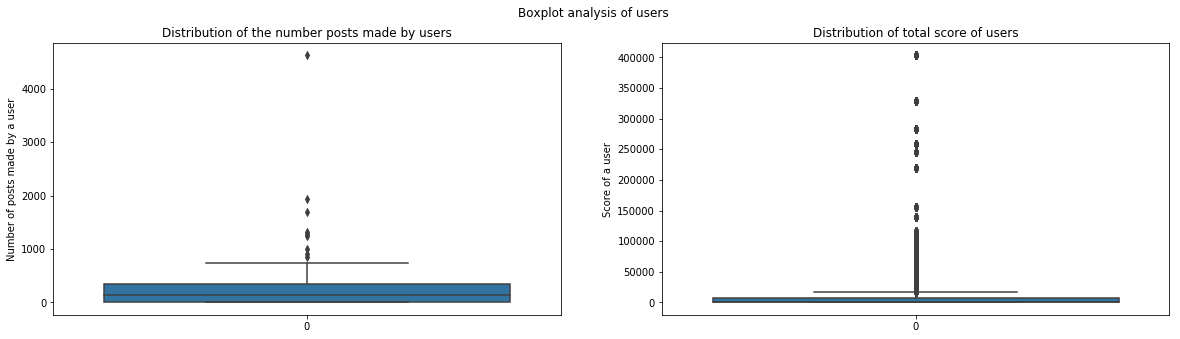

In [295]:
grp = df.groupby(by='username').count().link_karma.sort_values(ascending=False)

fig = plt.figure(figsize=(20,5))
plot_name = 'Boxplot analysis of users'
fig.suptitle(plot_name)

grp = df.groupby(by='username').count().link_karma.sort_values(ascending=False)
ax = fig.add_subplot(1,2,1)
ax_name = 'Distribution of the number posts made by users'
sns.boxplot(data=grp,ax=ax)
ax.set_ylabel('Number of posts made by a user')
ax.set_title(ax_name)
#xc1 = grp.median()
#ax.axvline(x=xc1, label='Median at x = {}'.format(xc1), c='b')
##xc = grp.mean()
#ax.axvline(x=xc, label='Mean at x = {}'.format(xc), c='r')
#plt.legend()


test = pd.read_csv('C:\\Users\\delah\\Documents\\Programming\\workspace\\AAForB_Assignment4\\data\\users\\input\\useranalysis')
total_scores_per_user = test.loc[:,['u.username','p.score']].groupby('u.username').sum().sort_values(by='p.score', ascending=False).reset_index() 
total_scores_per_user = total_scores_per_user.rename(columns={'p.score':'total_score_per_user'})
test = pd.merge(left=test,right=total_scores_per_user,how='left',left_on='u.username',right_on='u.username')


grp = test.loc[:,'total_score_per_user']
ax = fig.add_subplot(1,2,2)
ax_name = 'Distribution of total score of users'
sns.boxplot(data=grp,ax=ax)
ax.set_ylabel('Score of a user')
ax.set_title(ax_name)
#xc1 = grp.median()
#ax.axvline(x=xc1, label='Median at x = {}'.format(xc1), c='b')
#xc = grp.mean()
#ax.axvline(x=xc, label='Mean at x = {}'.format(xc), c='r')
#plt.legend()



plt.savefig(fname=VIS_DIR + plot_name)

In [ ]:
# x coordinates for the lines
xcoords = [0.1, 0.3, 0.5]
# colors for the lines
colors = ['r','k','b']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c)


In [84]:
grp.mean

<bound method Series.mean of username
SeventhConstellation    4628
-ZeuS--                 1938
KinnerNevada            1701
pink_paper_heart        1326
johntempleton           1288
Gonzo_B                 1242
n1ght_w1ng08             994
hash0t0                  911
Viewfromthe31stfloor     843
mythrowawaybabies        745
Frocharocha              643
CgmatterTutorials        612
lexinshanghai            527
SantiGir20               510
Yamagemazaki             477
bradipaurbana            447
johnruby                 446
princey12                440
DoremusJessup            417
mchamst3r                401
Scbadiver                399
tenders74                382
Trooper9520              375
shallah                  370
BalkanEagles             353
HugeDetective0           343
hildebrand_rarity        342
Canuknucklehead          326
ohnoh18                  311
Zhana-Aul                295
                        ... 
aleeea                    33
aaf97                     29
Alan_

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
chart = sns.countplot(data=df,x='subreddit',ax=ax, order=df['subreddit'].value_counts().index)
ax.set_xticklabels(rotation=90,labels=ax.get_xticklabels())

plot_name = 'count_of_posts_per_subreddit'
plt.savefig(fname=VIS_DIR + plot_name)





# Neo4J Queries

How often the article about prince charles is reposted

In [31]:
# TODO: ADD ALL NEO4J Queries

What is the most reposted article on covid containing bullshit

C:\Users\delah\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\delah\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\delah\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\delah\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


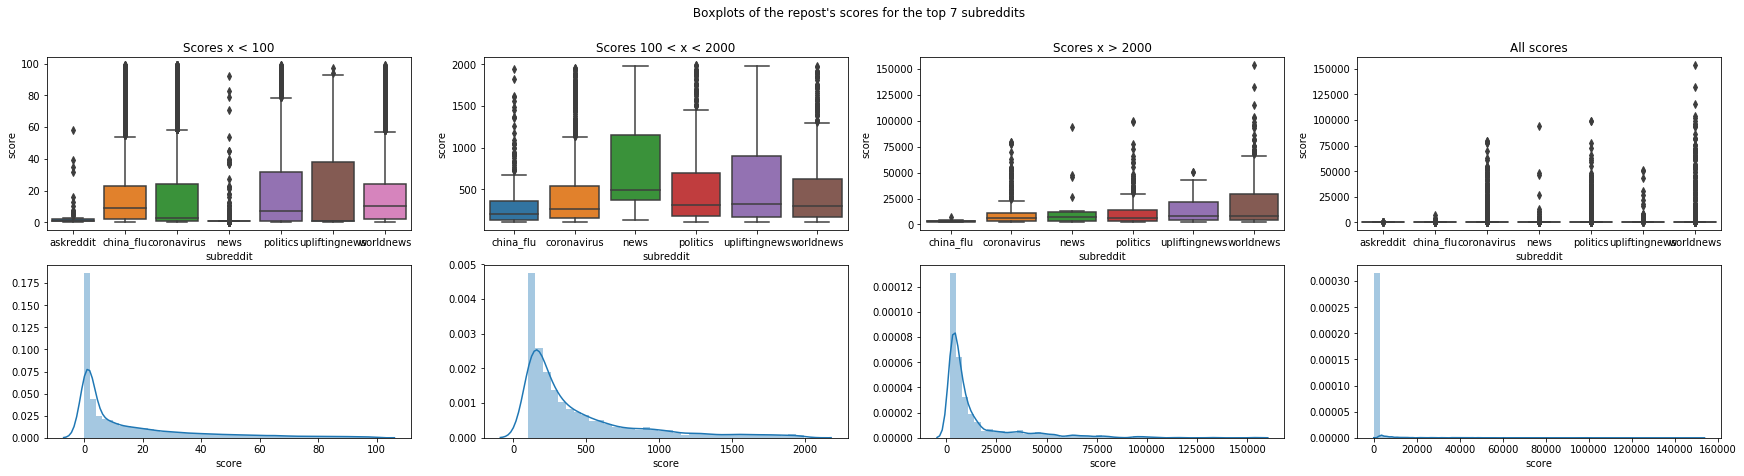

In [162]:
# Filter out the original dataframe to only contain the 7 most popular subreddits
top_7_subreddits = list(df['subreddit'].value_counts().index[0:7])
sub = df_reposts.loc[:,'subreddit']

#df7 = df.loc[sub.isin(top_7_subreddits)]
df7 = df_reposts.loc[sub.isin(top_7_subreddits)]
df7_very_low_scores = df7.loc[(df7.loc[:,'score'] < 100)]
df7_low_scores = df7.loc[(df7.loc[:,'score'] < 2000) & (df7.loc[:,'score'] > 100)]
df7_high_scores = df7.loc[df7.loc[:,'score'] > 2000]

# Creating figures and axes
fig = plt.figure(figsize=(30,7))
ax1 = fig.add_subplot(2,4,1)
ax2 = fig.add_subplot(2,4,2)
ax3 = fig.add_subplot(2,4,3)
ax4 = fig.add_subplot(2,4,4)
ax5 = fig.add_subplot(2,4,5)
ax6 = fig.add_subplot(2,4,6)
ax7 = fig.add_subplot(2,4,7)
ax8 = fig.add_subplot(2,4,8)


# Titles
fig.suptitle(" Boxplots of the repost's scores for the top 7 subreddits")
ax1.set_title('Scores x < 100')
ax2.set_title('Scores 100 < x < 2000')
ax3.set_title('Scores x > 2000')
ax4.set_title('All scores')


# Boxplots
sns.boxplot(data=df7_very_low_scores,x='subreddit',y='score',ax=ax1)
sns.boxplot(data=df7_low_scores,x='subreddit',y='score',ax=ax2)
sns.boxplot(data=df7_high_scores,x='subreddit',y='score',ax=ax3)
sns.boxplot(data=df7,x='subreddit',y='score',ax=ax4)


# Countplots
sns.distplot(a=df7_very_low_scores.score, ax=ax5)
sns.distplot(a=df7_low_scores.score, ax=ax6)
sns.distplot(a=df7_high_scores.score, ax=ax7)
sns.distplot(a=df7.score, ax=ax8)

plot_name = 'box_plot_of_repost_scores'
plt.savefig(fname=VIS_DIR + plot_name)

In [205]:
DATA_DIR = 'C:\\Users\\delah\\Documents\\Programming\\workspace\\AAForB_Assignment4\\data'
ANALYSIS_DIR = '\\coronavirustrends'
INPUT_DIR = '\\input'
OUTPUT_DIR = '\\output'
VIS_DIR = 'C:\\Users\\delah\\Documents\\Programming\\workspace\\AAForB_Assignment4\\outputs\\exploratory_analysis\\coronatrends\\'
os.chdir(DATA_DIR + ANALYSIS_DIR + INPUT_DIR)


sub = pd.read_csv('subredditstats.csv', delimiter=';')
sub.loc[:,'subscribers'] = sub.subscribers.replace(to_replace=r',', value='',regex=True)
sub.loc[:,'subscribers'] = sub.subscribers.values.astype(int)

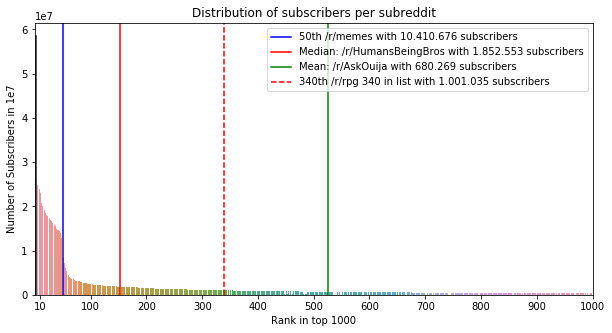

In [259]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
sns.barplot(data=sub,y=sub.subscribers, x= sub.id,ax=ax)

plot_name = 'Distribution of subscribers per subreddit'
ax.axvline(x=50, label='50th /r/memes with 10.410.676 subscribers', c='b', )
ax.axvline(x=152, label='Median: /r/HumansBeingBros with 1.852.553 subscribers', c='r')
ax.axvline(x=526, label='Mean: /r/AskOuija with 680.269 subscribers', c='g')
ax.axvline(x=340, label='340th /r/rpg 340 in list with 1.001.035 subscribers', c='r', linestyle='--')

ax.set_title(plot_name)
plt.legend()
ax.set_xlabel('Rank in top 1000')
ax.set_ylabel('Number of Subscribers in 1e7')
ax.set_xticks(ticks=[10,100,200,300,400,500,600,700,800,900,1000])
ax.set_xticklabels(labels=[10,100,200,300,400,500,600,700,800,900,1000])



plt.savefig(fname=VIS_DIR + plot_name)
